In [34]:
import pandas as pd

df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df.head()  

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [35]:
for i in range(len(df.columns)):
    missing_data = df[df.columns[i]].isna().sum()
    perc = missing_data / len(df) * 100
    print('>%d,  missing entries: %d, percentage %.2f' % (i, missing_data, perc))

>0,  missing entries: 0, percentage 0.00
>1,  missing entries: 3, percentage 0.00
>2,  missing entries: 3, percentage 0.00
>3,  missing entries: 0, percentage 0.00
>4,  missing entries: 3, percentage 0.00
>5,  missing entries: 0, percentage 0.00
>6,  missing entries: 0, percentage 0.00
>7,  missing entries: 0, percentage 0.00
>8,  missing entries: 0, percentage 0.00
>9,  missing entries: 0, percentage 0.00
>10,  missing entries: 0, percentage 0.00
>11,  missing entries: 341, percentage 0.23
>12,  missing entries: 0, percentage 0.00
>13,  missing entries: 7, percentage 0.00
>14,  missing entries: 3, percentage 0.00
>15,  missing entries: 3, percentage 0.00


In [36]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

df = df.dropna()  
df = df.drop_duplicates()

Missing values in each column:
 VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [37]:
print(df.dtypes)
df['Model Year'] = df['Model Year'].astype(int)

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract                                    float64
dtype: object


In [38]:
#loại bỏ các hàng có giá trị âm trong cột 'Electric Range'
df = df[df['Electric Range'] >= 0]

# Kiểm tra lại dữ liệu sau khi làm sạch
print(df.info())
print(df.describe())
# Lưu dữ liệu đã làm sạch vào file CSV mới
cleaned_file_path = 'Cleaned_Electric_Vehicle_Population_Data.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"Dữ liệu đã được làm sạch và lưu vào file: {cleaned_file_path}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150137 entries, 0 to 150481
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150137 non-null  object 
 1   County                                             150137 non-null  object 
 2   City                                               150137 non-null  object 
 3   State                                              150137 non-null  object 
 4   Postal Code                                        150137 non-null  float64
 5   Model Year                                         150137 non-null  int64  
 6   Make                                               150137 non-null  object 
 7   Model                                              150137 non-null  object 
 8   Electric Vehicle Type                              150137 non-null  object

In [39]:
import pandas as pd

file_path = 'Cleaned_Electric_Vehicle_Population_Data.csv'
df = pd.read_csv(file_path)

column = '2020 Census Tract'

Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)

IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
outliers_count = outliers.shape[0]

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"Number of outliers: {outliers_count}")

Lower bound: 53002915098.5
Upper bound: 53083167102.5
Number of outliers: 41


In [40]:
unique_counts = df.nunique()

print("Số lượng bản ghi unique của từng cột:")
print(unique_counts)

Số lượng bản ghi unique của từng cột:
VIN (1-10)                                             9522
County                                                   39
City                                                    461
State                                                     1
Postal Code                                             537
Model Year                                               22
Make                                                     37
Model                                                   127
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          102
Legislative District                                     49
DOL Vehicle ID                                       150137
Vehicle Location                                        537
Electric Utility                                         75
2020 Census Tract                                      1767
dt

Thống kê mô tả cho cột 'Electric Range':
count    150137.000000
mean         67.863978
std          96.224883
min           0.000000
25%           0.000000
50%          18.000000
75%          97.000000
max         337.000000
Name: Electric Range, dtype: float64


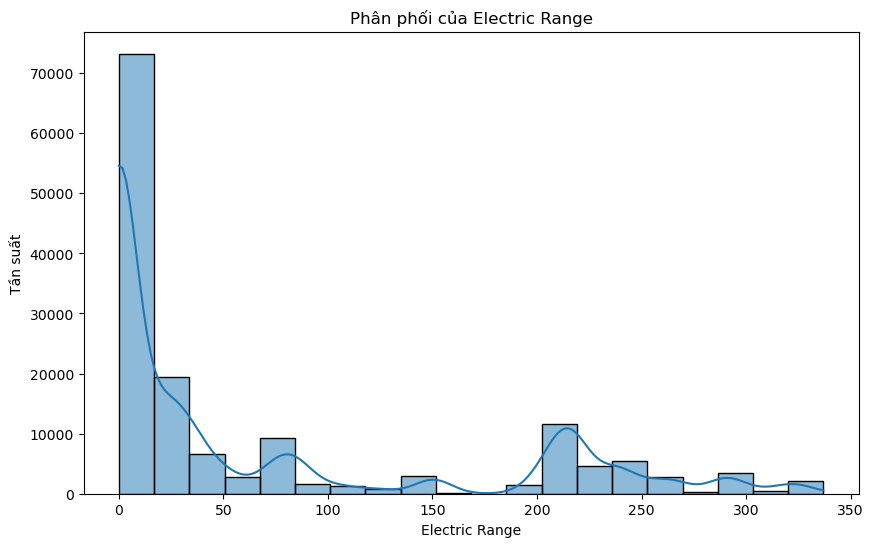

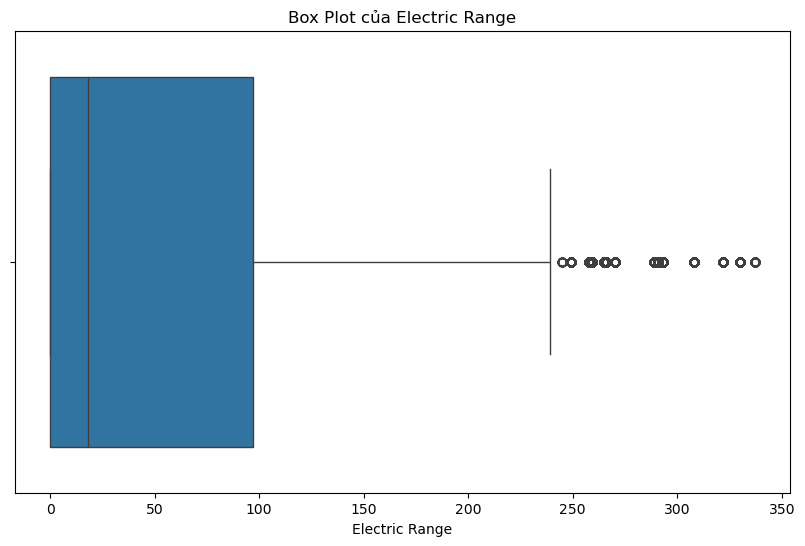

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Phân tích đơn biến cho cột 'Electric Range'
column = 'Electric Range'

# Thống kê mô tả
print(f"Thống kê mô tả cho cột '{column}':")
print(df[column].describe())

# Biểu đồ phân phối (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df[column], kde=True, bins=20)
plt.title(f'Phân phối của {column}')
plt.xlabel(column)
plt.ylabel('Tần suất')
plt.show()

# Biểu đồ Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[column])
plt.title(f'Box Plot của {column}')
plt.xlabel(column)
plt.show()

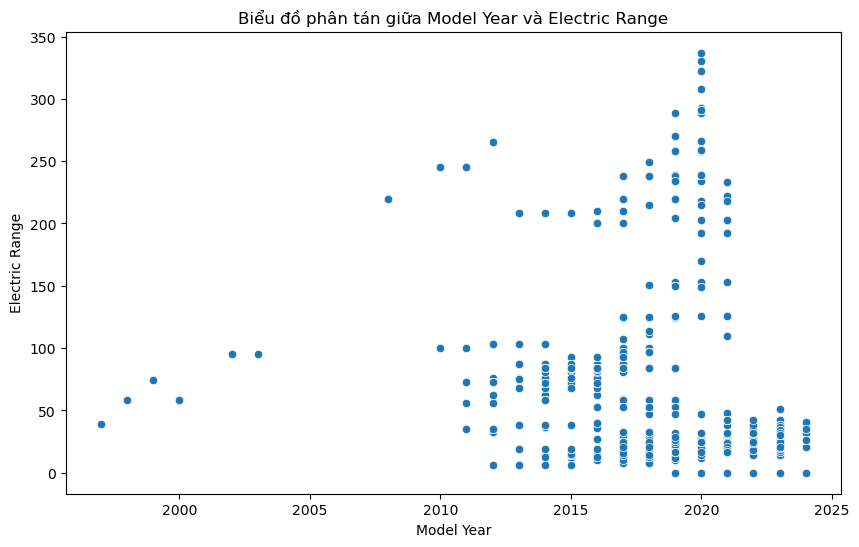

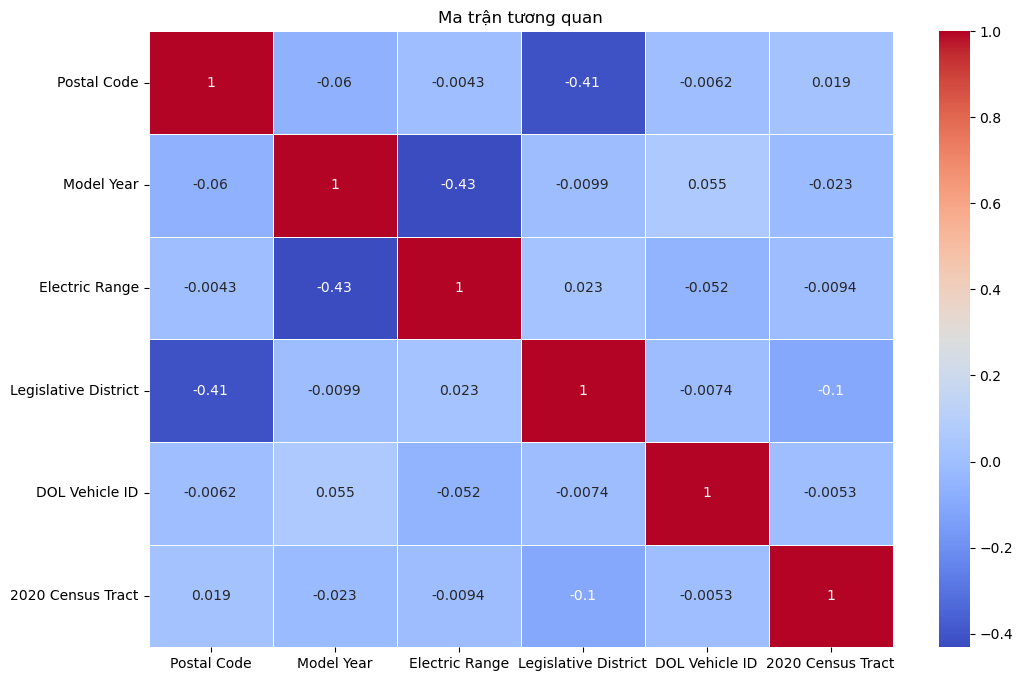

In [42]:
# Phân tích đa biến giữa 'Model Year' và 'Electric Range'
x_column = 'Model Year'
y_column = 'Electric Range'

# Biểu đồ phân tán (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_column, y=y_column, data=df)
plt.title(f'Biểu đồ phân tán giữa {x_column} và {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

# Ma trận tương quan (Correlation Matrix)
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Ma trận tương quan')
plt.show()